# Uebung 11

## Aufgabe 1

Das Shapefile "daten/continent/continent.shp" enhält die Kontinente ["Africa", "Antarctica", "Asia", "Australia", "Europe", "North America", "Oceania", "South America"].

a) Laden Sie das Shapefile mit geopandas und erstellen Sie das GeoDataFrame **gdfContinents**. Geben Sie dieses als Tabelle aus.

b) In welchem Koordinatenreferenzsystem ist dieser Datensatz ?

c) Erstellen Sie ein GeoDataFrame für Europa

d) Erstellen Sie ein GeoDataFrame für alle Kontinente **ausser** Europa

e) Plotten Sie die beiden GeoDataFrames in verschiedenen Farben

In [3]:
import geopandas as gpd

gdfContinents = gpd.read_file("daten/continent.shp")
gdfContinents

,geometry
0,"MULTIPOLYGON (((93.27554 80.26361, 93.31304 80..."
1,"MULTIPOLYGON (((-25.28167 71.39166, -25.32889 ..."
2,"MULTIPOLYGON (((58.06138 81.68776, 57.98055 81..."
3,"MULTIPOLYGON (((0.69465 5.77337, 0.66667 5.803..."
4,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."
5,"MULTIPOLYGON (((-177.39334 28.18416, -177.3958..."
6,"MULTIPOLYGON (((142.27997 -10.26556, 142.21053..."
7,"MULTIPOLYGON (((51.80305 -46.45667, 51.72139 -..."


In [4]:
gdfContinents.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

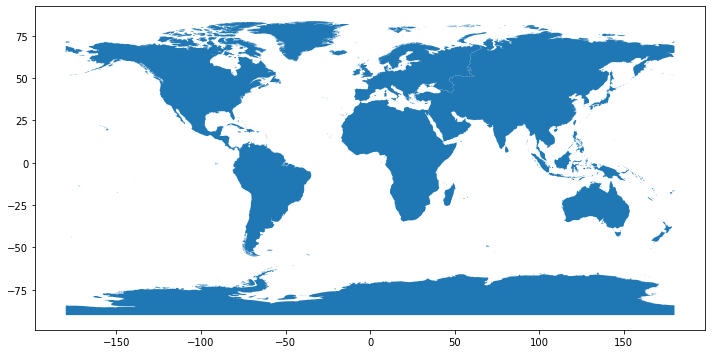

In [5]:
gdfContinents.plot(figsize=(12,6));

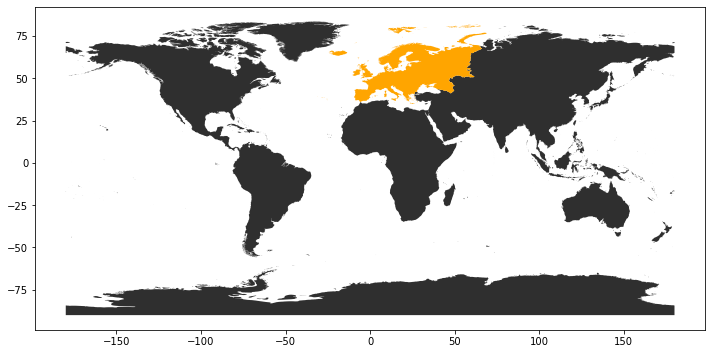

In [6]:
from shapely.geometry import Point
import matplotlib.pyplot as plt

FHNW_wgs84 = Point(7.6419605, 47.5348685)
EU_idx = gdfContinents.contains(FHNW_wgs84)  # boolean mask

gdf_EU = gdfContinents[EU_idx]
gdf_non_EU = gdfContinents[~EU_idx]  

fig, ax = plt.subplots(figsize=(12,6))

gdf_non_EU.plot(ax=ax, color="#2f2f2f");
gdf_EU.plot(ax=ax, color="orange", aspect='equal');

In [7]:
import numpy as np

# ~ Operator -> "bitwise complement"
# https://numpy.org/doc/stable/reference/generated/numpy.invert.html


a = np.array([True, False, True])
~a

array([False,  True, False])

## Aufgabe 2


Die Erdbeben aus den Daten des USGS werden als GeoDataFrame geladen:

```python
import requests

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"

data = requests.get(url)
file = open("earthquakes.geojson","wb")
file.write(data.content)
file.close()
eb = gpd.read_file("earthquakes.geojson")
```


a) Erstellen Sie unter Verwendung des zuvor erstellen GeoDataFrame "eb" folgende neue Geodataframes:

* eb3 enthält Erdbeben mit Magnitude [3.5, 4)
* eb4 enthält Erdbeben mit Magnitude [4, 5)
* eb5 enthält Erdbeben mit Magnitude 5 und grösser.

Hinweis: am einfachsten verwenden Sie dazu eb.query("????")

b) Bestimmen Sie die Anzahl Beben in eb3, eb4, eb5<br/>

c) Stellen Sie eb3, eb4 und eb5 auf einer Karte mit Folium dar (Erdbeben als Marker)

In [8]:
import os
import requests

def load_data(update_local=True):
    url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
    filename = "earthquakes.geojson"
    
    if os.path.exists(filename) and not update_local:
        print("Loading from file...")
        eb = gpd.read_file(filename)
    else:
        print("Downloading...")
        eb = gpd.read_file(url)
        eb.to_file("earthquakes.geojson", driver='GeoJSON')

    return eb

In [9]:
eb = load_data(update_local=False)
eb.head()

Loading from file...


,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,us6000gcdj,4.8,"101 km W of La Libertad, Mexico",1639564720504,1639565959040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",NaN,1.450,0.89,155.0,mb,earthquake,"M 4.8 - 101 km W of La Libertad, Mexico",POINT Z (-113.74370 29.94260 10.00000)
1,us6000gcdd,4.3,"Rat Islands, Aleutian Islands, Alaska",1639563888028,1639564825040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,ak,",",origin,phase-data,shakemap,",NaN,0.196,0.83,168.0,mb,earthquake,"M 4.3 - Rat Islands, Aleutian Islands, Alaska",POINT Z (178.26620 52.01070 128.77000)
2,us6000gcd6,4.0,"2 km SSW of Gypsum, Kansas",1639562301667,1639574360292,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,88.0,4.1,...,",us,",",dyfi,losspager,moment-tensor,origin,phase-dat...",NaN,0.758,0.56,61.0,mwr,earthquake,"M 4.0 - 2 km SSW of Gypsum, Kansas",POINT Z (-97.44410 38.68220 3.00000)
3,us6000gcd2,4.5,Flores Sea,1639559671056,1639562115040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",NaN,1.607,0.93,100.0,mb,earthquake,M 4.5 - Flores Sea,POINT Z (121.20830 -7.38440 10.00000)
4,us6000gccv,5.0,"58 km NE of Masjed Soleymān, Iran",1639556470221,1639566052425,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,3.0,4.8,...,",us,",",dyfi,origin,phase-data,",NaN,4.321,1.10,74.0,mb,earthquake,"M 5.0 - 58 km NE of Masjed Soleymān, Iran",POINT Z (49.70490 32.34240 10.00000)


In [10]:
eb3 = eb.query("mag >= 3.5 & mag < 4.0")
eb4 = eb.query("mag >= 4.0 & mag < 5.0")
eb5 = eb.query("mag >= 5.0")

In [11]:
eb3.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
15,us6000gcbl,3.70,"81 km W of Vallenar, Chile",1639537530812,1639543279965,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,2.0,2.0,...,",us,",",dyfi,moment-tensor,origin,phase-data,",NaN,0.6270,0.77,172.0,mwr,earthquake,"M 3.7 - 81 km W of Vallenar, Chile",POINT Z (-71.59160 -28.63730 37.18000)
26,us6000gca9,3.70,"52 km S of Ivanof Bay, Alaska",1639524379199,1639529909037,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ak,us,",",origin,phase-data,shakemap,",NaN,0.5000,0.85,128.0,mb,earthquake,"M 3.7 - 52 km S of Ivanof Bay, Alaska",POINT Z (-159.61280 55.43560 46.89000)
59,ci39886887,3.90,"55km S of Estacion Coahuila, B.C., MX",1639463775330,1639550293776,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,us,",",nearby-cities,origin,phase-data,scitech-link,...",11.0,0.6017,0.20,162.0,ml,earthquake,"M 3.9 - 55km S of Estacion Coahuila, B.C., MX",POINT Z (-115.05383 31.69967 5.48000)
84,ak021fy3inwx,3.50,"158 km SE of Chignik, Alaska",1639403387331,1639414719040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,ak,",",origin,phase-data,shakemap,",NaN,NaN,0.59,NaN,ml,earthquake,"M 3.5 - 158 km SE of Chignik, Alaska",POINT Z (-156.76480 55.21180 6.20000)
120,pr2021346008,3.53,Mona Passage,1639329735660,1639339006241,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1.0,2.2,...,",pr,us,",",dyfi,origin,phase-data,",25.0,0.2049,0.30,185.0,md,earthquake,M 3.5 - Mona Passage,POINT Z (-67.42900 18.58310 9.00000)


In [12]:
eb5.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
4,us6000gccv,5.0,"58 km NE of Masjed Soleymān, Iran",1639556470221,1639566052425,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,3.0,4.8,...,",us,",",dyfi,origin,phase-data,",NaN,4.321,1.10,74.0,mb,earthquake,"M 5.0 - 58 km NE of Masjed Soleymān, Iran",POINT Z (49.70490 32.34240 10.00000)
6,us6000gcch,5.1,south of the Fiji Islands,1639552453984,1639553569040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",NaN,3.814,1.33,48.0,mb,earthquake,M 5.1 - south of the Fiji Islands,POINT Z (179.95730 -25.93210 478.73000)
36,us6000gc8k,5.0,"123 km ESE of Pondaguitan, Philippines",1639507296123,1639508860040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",NaN,2.012,0.79,95.0,mb,earthquake,"M 5.0 - 123 km ESE of Pondaguitan, Philippines",POINT Z (127.11880 5.75350 61.97000)
50,us6000gc5d,5.1,"Kermadec Islands, New Zealand",1639485937831,1639487141040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",NaN,1.186,1.63,108.0,mww,earthquake,"M 5.1 - Kermadec Islands, New Zealand",POINT Z (-177.54070 -30.40560 10.85000)
57,us6000gc4q,5.5,"110 km N of Maumere, Indonesia",1639470691350,1639557318397,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",losspager,origin,phase-data,shakemap,",NaN,1.005,0.82,51.0,mww,earthquake,"M 5.5 - 110 km N of Maumere, Indonesia",POINT Z (122.30930 -7.62580 10.00000)


In [13]:
print("(3.5 <= Mag. < 4.0): N =", len(eb3))
print("(4.0 <= Mag. < 5.0): N =", len(eb4))
print("(5.0 <= Mag.      ): N =", len(eb5))

(3.5 <= Mag. < 4.0): N = 40
(4.0 <= Mag. < 5.0): N = 164
(5.0 <= Mag.      ): N = 38


In [14]:
import folium

map = folium.Map(location=[0,0], tiles="cartodb positron", zoom_start=2)

for _, row in eb3.iterrows():
    lon = row['geometry'].x
    lat = row['geometry'].y
    mag = row['mag']
    tooltip = row['title']
    folium.CircleMarker(location=(lat,lon), radius=2*mag, color='orange', tooltip=tooltip).add_to(map)

for _, row in eb4.iterrows():
    lon = row['geometry'].x
    lat = row['geometry'].y
    mag = row['mag']
    tooltip = row['title']
    folium.CircleMarker(location=(lat,lon), radius=2*mag, color='red', tooltip=tooltip).add_to(map)

for _, row in eb5.iterrows():
    lon = row['geometry'].x
    lat = row['geometry'].y
    mag = row['mag']
    tooltip = row['title']
    folium.CircleMarker(location=(lat,lon), radius=2*mag, color='purple', tooltip=tooltip).add_to(map)
map

In [15]:
from folium import plugins

url_base = 'http://server.arcgisonline.com/ArcGIS/rest/services/'
service = 'NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}'
tileset = url_base + service
copyright = "© National Geographic, Esri, Garmin, HERE, UNEP-WCMC, USGS, NASA, ESA, METI, NRCAN, GEBCO, NOAA, increment P Corp."

map = folium.Map(location=[0,0], tiles=tileset, zoom_start=2, attr=copyright)

data = [(row['geometry'].y, row['geometry'].x, row['mag']) for _, row in eb.iterrows()]

plugins.HeatMap(data, radius=24).add_to(map)
map